<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/Code/train_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Entspannter/CrispCerebella/blob/main/Test_File.ipynb)

In [ ]:
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (288/288), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 288 (delta 122), reused 179 (delta 50), pack-reused 0
Receiving objects: 100% (288/288), 75.69 MiB | 18.58 MiB/s, done.
Resolving deltas: 100% (122/122), done.
Checking out files: 100% (166/166), done.


In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 102kB 6.6MB/s 


In [ ]:
import os 
from google.colab import files
from tensorflow.keras.utils import to_categorical
import keras_tuner

In [ ]:
# Import own functions and model-classes
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *


In [ ]:
# load all train
trainX, trainy = datasetloader('train', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of training Data:",trainX.shape, trainy.shape)
# load all test
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:",testX.shape, testy.shape)

Shape of training Data: (7352, 128, 9) (7352, 1)
Shape of test Data: (2947, 128, 9) (2947, 1)


In [ ]:
# transform the output date into categorical (one-hot-encoding) and print the updated shapes
trainX, trainy, testX, testy = transform_dataset(trainX, trainy, testX, testy)

n_timesteps, n_features, N_OUTPUTS = trainX.shape[1], trainX.shape[2], trainy.shape[1]

n_steps, n_length = 4, 32

# define the inout share for the LSTM model
INPUT_SHAPE=(n_timesteps,n_features)

Num_Epochs_Search = 40
Num_Epochs_Fit = 20
Max_Trials = 5
Num_K_Folds = 5
Model_Name_LSTM = "LSTM"
batch_size = 64

# merge the train and test data to recreate the initial dataset for later
# splitting in the k-fold process
X_LSTM = np.concatenate((trainX, testX),axis=0)
y_LSTM = np.concatenate((trainy, testy),axis=0)


(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [ ]:
# Hyperparameters tuning inside of k-fold CV
Best_HP_LSTM, Best_Epoch_LSTM= k_fold_cv(X_LSTM,
                                                              y_LSTM,
                                                              LSTMStacked,
                                                              Model_Name_LSTM,
                                                              INPUT_SHAPE,
                                                              N_OUTPUTS,
                                                              Max_Trials,
                                                              Num_Epochs_Search,
                                                              Num_Epochs_Fit,
                                                              Num_K_Folds)


Trial 3 Complete [00h 00m 07s]
val_accuracy: 0.3555825352668762

Best val_accuracy So Far: 0.3555825352668762
Total elapsed time: 00h 00m 25s
INFO:tensorflow:Oracle triggered exit
[The tuned hyperparemters]: {'Units_LSTM_1': 128, 'dropout_1': 0.5, 'Units_LSTM_2': 32, 'dropout_2': 0.0, 'units': 128, 'dense_activation': 'sigmoid', 'learning_rate': 0.00010514888797927254}
206/206 [==============================] - 6s 20ms/step - loss: 1.6162 - accuracy: 0.3315 - val_loss: 1.4263 - val_accuracy: 0.3459
Best epoch: 1
65/65 [==============================] - 0s 6ms/step - loss: 1.4434 - accuracy: 0.3541
Fold number 5 is done
Accuracy of each fold - [0.7320388555526733, 0.7699028849601746, 0.670873761177063, 0.5553398132324219, 0.35405537486076355]
Avg accuracy : 0.6164421379566193


In [ ]:
# Print the hyperparameters that yielded the best model all over the k-folds
Best_HP_LSTM.get_config()['values']

{'Units_LSTM_1': 48,
 'Units_LSTM_2': 48,
 'dense_activation': 'tanh',
 'dropout_1': 0.35000000000000003,
 'dropout_2': 0.45,
 'learning_rate': 0.006913157533608411,
 'units': 80}

184/184 [==============================] - 6s 16ms/step - loss: 0.8187 - accuracy: 0.6407 - val_loss: 0.8016 - val_accuracy: 0.7186


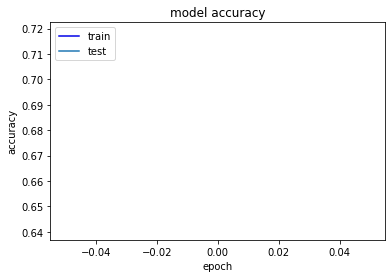

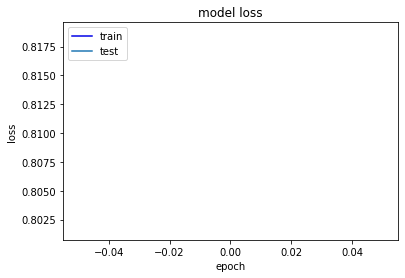

The accureay of the model is 0.6491346955299377


In [ ]:
# Build a new model with the HP, train it with the inital training set and eveluate it with the test set 

BestModelLSTM, LSTM_accuracy = evaluate_model(trainX,
                               trainy,
                               testX,
                               testy,
                               INPUT_SHAPE,
                               N_OUTPUTS,
                               Best_HP_LSTM,
                               LSTMStacked,
                               Best_Epoch_LSTM,
                               batch_size)


In [ ]:
# create a unique file name by attaching the first four accuracy digits

file_name_ending = str(int(LSTM_accuracy * 10000))

In [ ]:
# save the model by using the unique file name (model name + accuracy)
BestModelLSTM.save("/content/CrispCerebella/Models/Final_Model_LSTM_" + file_name_ending)

INFO:tensorflow:Assets written to: /content/CrispCerebella/Models/Final_Model_LSTM_6491/assets


INFO:tensorflow:Assets written to: /content/CrispCerebella/Models/Final_Model_LSTM_6491/assets


In [ ]:
# create a zip file out of the saved model

!zip -r /content/CrispCerebella/Models/Final_Model_LSTM_{file_name_ending}.zip /content/CrispCerebella/Models/Final_Model_LSTM_{file_name_ending}

  adding: content/CrispCerebella/Models/Final_Model_LSTM/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM/.ipynb_checkpoints/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM/saved_model.pb (deflated 90%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM/variables/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM/variables/variables.index (deflated 67%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM/assets/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM/keras_metadata.pb (deflated 80%)


In [ ]:
# downloading the zip file (to store it locally and be able to push it to git)

files.download(f"/content/CrispCerebella/Models/Final_Model_LSTM_{file_name_ending}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# unzip the folder of the model with a given accuracy
# !unzip /content/CrispCerebella/Models/Final_Model_LSTM_{file_name_ending}.zip -d /Test

Archive:  /content/CrispCerebella/Models/Final_Model_LSTM.zip
   creating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/
   creating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/.ipynb_checkpoints/
  inflating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/saved_model.pb  
   creating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/variables/
  inflating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/variables/variables.data-00000-of-00001  
  inflating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/variables/variables.index  
   creating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/assets/
  inflating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/keras_metadata.pb  


In [ ]:
# load the saved model
# test_model = keras.models.load_model(f'/content/CrispCerebella/Test/content/CrispCerebella/Models/Final_Model_LSTM_{file_name_ending}')

In [ ]:
# evaluate the saved model
# test_model.evaluate(testX, testy)

93/93 [==============================] - 3s 30ms/step - loss: 0.8421 - accuracy: 0.6491


[0.8420565724372864, 0.6491346955299377]